# Simulating dendrites

## Exercise 2: How inputs inputs interact in time.

In this exercise we will see how inputs integrate when they are seperated in time.

In [1]:
#@markdown # Install NEURON Simulator
!pip install neuron --quiet  # install neuron simulator

     |████████████████████████████████| 8.7MB 4.7MB/s 


In [2]:
#@markdown ## Make nice plots!
from matplotlib import pyplot as plt
import matplotlib as mpl
plt.rcParams.update({
    "font.size": 18,
    })

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['ytick.major.width'] = 3
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 7
mpl.rcParams['xtick.major.size'] = 7

In [4]:
from neuron import h, gui

# Simulation parameters	
h.tstop = 200       # ms
h.dt = 0.1          # ms
h.steps_per_ms = 10	# For plotting-should be compartible with dt
h.v_init = -65      # mV

### Create a soma and one dendrite, define their anatomical and biophysical properties and connect them.

In [5]:
soma = h.Section(name='soma')
dend0 = h.Section(name='dend0') 

# Define properties of soma
soma.diam = 18	# um
soma.L = 18    	# um
soma.Ra = 100   # Axial resistance, Ohm * cm
soma.cm = 1     # specific membrane capacitance, uF/cm^2   
soma.nseg = 1	  # number of segments

# Insert passive (leak) channels in soma
soma.insert('pas')
soma.e_pas = -65     # mV
soma.g_pas = 0.0003  # nS/cm^2

# Define properties of dend0
dend0.diam = 5	 # um
dend0.L = 700	   # um
dend0.nseg = 11  # number of segments
dend0.cm = 1     # specific membrane capacitance, uF/cm^2  
dend0.Ra = 100   # Axial resistance, Ohm * cm

# Insert passive (leak) channels in dend0
dend0.insert('pas')
for seg in dend0:
  seg.pas.e = -65     # mV
  seg.pas.g = 0.0003  # nS/cm^2

dend0.connect(soma(0), 0)  # Connect the 0 point of dendrite 0 to the zero point of the soma

dend0

### Task 1: We will add three `ExpSyn` in the different parts of the dendrite

What will happen to the temporal summation of the inputs if they are activated sequentially with 10ms intervals? Do you expect the temporal order of activation to affect the output?

In [6]:
#========== Synaptic stimulation.
# Place three synapses, one in the end, one in the middle and one in the begining of the dendrite.  (0.5) of the soma, ...
Syn0 = h.ExpSyn(dend0(0.9))
Syn0.e = 0     # mV
Syn0.tau = 10  # ms

Syn1 = h.ExpSyn(dend0(0.5))
Syn1.e = 0     # mV
Syn1.tau = 10  # ms

Syn2 = h.ExpSyn(dend0(0.1))
Syn2.e = 0     # mV
Syn2.tau = 10  # ms

#========== ...create an artificial spike (an "event" to be delivered to the synapse)...
ns = h.NetStim(0.5)
ns.start = 20  # ms
ns.number = 1

#... and connect the event to the synapse.
nc0 = h.NetCon(ns,Syn0, -10, 20, 0.003)
nc1 = h.NetCon(ns,Syn1, -10, 10, 0.003)
nc2 = h.NetCon(ns,Syn2, -10, 0, 0.003)

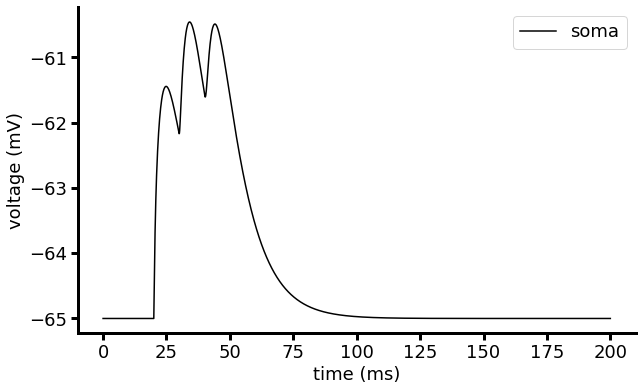

Somatic depolarization is 4.54 mV


In [7]:
# Calculate and print in terminal the depolarization at the soma and at the middle part of the distal dendrite (dendrite[1])
vsoma_vec = h.Vector()  # Membrane potential vector
t_vec = h.Vector()      # Time stamp vector
vsoma_vec.record(soma(0.5)._ref_v)
t_vec.record(h._ref_t)

h.run()

plt.figure(figsize=(10, 6))
plt.plot(t_vec, vsoma_vec, color='black', label='soma')
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
plt.legend()
plt.show()

print (f'Somatic depolarization is {round(vsoma_vec.max() - vsoma_vec.min(), 2)} mV')

![picture](https://drive.google.com/uc?id=13qOF930C-bmG_8Ym1yMQ4ySJutW9RMuK)

References:
1. Rall W (1964) Theoretical significance of dendritic trees for neuronal input output relations Neural Theory and Modeling, Reiss RF, ed. pp.73

![picture](https://drive.google.com/uc?id=1Eo5Y-N2HSBNZBVpbTOiam4WehSTpeSiq)

References:
1. Branco, Clark, Häusser (2010) Dendritic discrimination of temporal input sequences in cortical neurons, Science, 2010 Sep 24;329(5999):1671-5. doi: [10.1126/science.1189664](https://doi.org/10.1126/science.1189664)